In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read all tables and assign indices

# this is IR spreadsheet of classes data
classes = pd.read_csv('data/IR_spreadsheet.csv', index_col='section_number')

# this is the data we are waiting for: grades of students related with race, gender, etc
outcome = pd.read_csv('mock_up_data/tailored_mock_data_OutcomeProfile.csv')

# this is the output from our CCID neural network 
roomConfig = pd.read_csv('mock_up_data/tailored_mock_data_RoomConfig.csv', index_col=['section_number', 'meeting_number'])

In [4]:
# drop duplicates
classes = classes.drop_duplicates()

In [7]:
outcome

,section_number,gpa,race,gender
0,10205,3.5,asian,m
1,10205,3.5,asian,f
2,10205,4.0,caucasian,m
3,10205,3.2,african,m
4,10205,3.2,asian,f
5,10205,3.6,asian,m
6,10205,4.0,african,f
7,10205,2.5,cauciasian,f
8,10205,2.2,caucasian,m
9,10205,2.7,caucasian,f


## 1. What is the average configuration ratio for section number 10205?

In [8]:
sel = roomConfig.loc[10205]
config_categories = ['empty', 'lecture', 'round', 'groups']
config_percentage = {col: (sel[col]/sel['total_frames']).mean() for col in config_categories}
config_percentage

{'empty': 0.31249999999999994,
 'lecture': 0.1325,
 'round': 0.21749999999999997,
 'groups': 0.3375}

Class code: CENG115


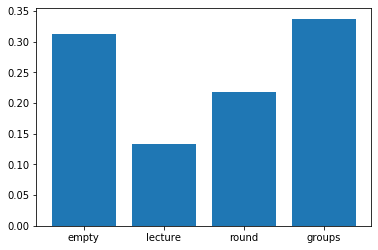

In [9]:
print('Class code: %s%s' % (classes.loc['10205'].subject, classes.loc['10205'].course_number))
plt.bar(range(len(config_percentage)), config_percentage.values())
plt.xticks(range(len(config_percentage)), config_percentage.keys())
plt.show()

## 2. Based on ethnicities of the students, what's the avergae grade?

So will need to get a dictionary of gpa and dictionary of config ratio with ethnicities as keys

In [16]:
# get a list of all races
races = outcome.race.unique()

# select just a race and find students with that race
r = races[0] # asian
sel = outcome[outcome.race==r]

# get average gpa
asian_gpa = sel.gpa.mean()